In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv("/content/used_cars.csv")

In [24]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [25]:
data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [26]:
data["price"] = data["price"].str.replace("$" , "")
data["price"] = data["price"].str.replace("," , "").astype(int)
data["milage"] = data["milage"].str.replace("," , "")
data["milage"] = data["milage"].str.replace("mi." , "").astype(int)

In [27]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [28]:
# clean the accident column
data['accident'] = data['accident'].apply(lambda x: 0 if "None" in str(x) else 1)

In [29]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,NaN,34999


In [30]:
# --- Clean title ---
data['clean_title'] = data['clean_title'].apply(lambda x: 1 if str(x)=="Yes" else 0)

In [31]:
# --- Extract horsepower and liters from 'engine' ---

def extract_engine_features(text):
    text = str(text)

    # Horsepower: e.g. "300.0HP", "300 HP"
    hp_match = re.search(r"(\d+\.?\d*)\s*HP", text, re.IGNORECASE)
    hp_val = float(hp_match.group(1)) if hp_match else np.nan

    # Engine size: e.g. "3.7L", "3.5 Liter", "3.5L" (captures variety)
    liter_match = re.search(r"(\d+\.?\d*)\s*(?:L\b|Liter\b)", text, re.IGNORECASE)
    liter_val = float(liter_match.group(1)) if liter_match else np.nan

    return pd.Series([hp_val, liter_val], index=['horsepower', 'engine_liters'])

In [32]:
data[['horsepower', 'engine_liters']] = data['engine'].apply(extract_engine_features)

In [33]:
data = data.drop(columns=['engine'])

In [34]:
data.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_liters
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,1,1,10300,300.0,3.7
1,Hyundai,Palisade SEL,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005,NaN,3.8
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,0,0,54598,NaN,3.5
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,0,1,15500,354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,0,0,34999,NaN,2.0


In [35]:
# one hot encoding
categorical_cols = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [36]:
data.columns

Index(['model_year', 'milage', 'accident', 'clean_title', 'price',
       'horsepower', 'engine_liters', 'brand_Alfa', 'brand_Aston',
       'brand_Audi',
       ...
       'int_col_Titan Black / Quarzit', 'int_col_Tupelo',
       'int_col_Very Light Cashmere', 'int_col_WHITE', 'int_col_Walnut',
       'int_col_Whisper Beige', 'int_col_White', 'int_col_White / Brown',
       'int_col_Yellow', 'int_col_–'],
      dtype='object', length=2500)

In [37]:
data.head()

,model_year,milage,accident,clean_title,price,horsepower,engine_liters,brand_Alfa,brand_Aston,brand_Audi,...,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–
0,2013,51000,1,1,10300,300.0,3.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,34742,1,1,38005,NaN,3.8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,22372,0,0,54598,NaN,3.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,88900,0,1,15500,354.0,3.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,9835,0,0,34999,NaN,2.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [38]:
data = data.dropna(subset=['price'])

In [40]:
data.dropna(inplace=True)

In [42]:
data.isna().sum().sum()

np.int64(0)

In [43]:
# Features/Target Split
# =======================
X = data.drop("price", axis=1).values
y = data["price"].values.reshape(-1, 1)

In [45]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_norm = scaler_x.fit_transform(X)
y_norm = scaler_y.fit_transform(y)

In [47]:
# Train/Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [49]:
n_features = X_train.shape[1]  # number of columns in your training data
n_features

2499

In [50]:
# A simple linear regression model
model = nn.Linear(n_features, 1)

# Loss function for regression
loss_fn = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [56]:
epochs = 10000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


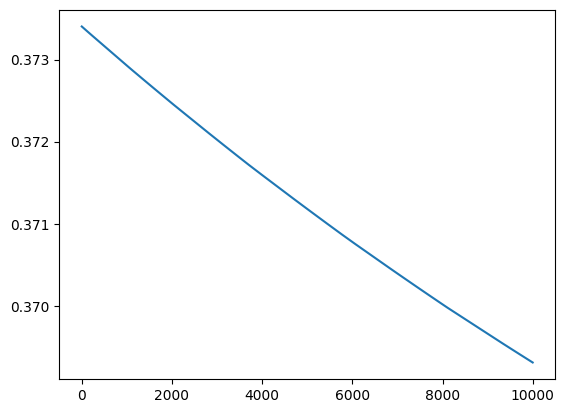

In [57]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()



In [59]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = loss_fn(y_pred_test, y_test)
    print(f"Test Loss (MSE): {test_loss.item():.4f}")

Test Loss (MSE): 1.5465
